<a href="https://colab.research.google.com/github/andydaehn/Twitter-Climate-Change-Sentiment/blob/main/Twitter_Climate_Change.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# # To mount Google Drive
# from google.colab import drive
# drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames


# Pretty display for notebooks
%matplotlib inline

# Set a random seed
import random
random.seed(42)



# Load the datasets
in_file = 'The_Climate_Change_Twitter_Dataset.csv'
main_data = pd.read_csv(in_file)

disasters = pd.read_csv('disasters.csv')


# Print the first entries of the Twitter Climate Change dataset
display(main_data.head())

# Print the first entries from the disasters dataset
display(disasters.head())

,created_at,id,lng,lat,topic,sentiment,stance,gender,temperature_avg,aggressiveness
0,2006-06-06 16:06:42+00:00,6132,NaN,NaN,Weather Extremes,-0.097180,neutral,female,NaN,aggressive
1,2006-07-23 21:52:30+00:00,13275,-73.949582,40.650104,Weather Extremes,0.575777,neutral,undefined,-1.114768,aggressive
2,2006-08-29 01:52:30+00:00,23160,NaN,NaN,Weather Extremes,0.500479,neutral,male,NaN,aggressive
3,2006-11-07 02:46:52+00:00,57868,NaN,NaN,Weather Extremes,0.032816,neutral,male,NaN,aggressive
4,2006-11-27 14:27:43+00:00,304553,NaN,NaN,Importance of Human Intervantion,-0.090428,neutral,male,NaN,aggressive


,Disaster Type,Disaster Subtype,Disaster Group,Disaster Subgroup,Event Name,Origin,Country,Location,Latitude,Longitude,start_date,end_date,Total Deaths,No Affected,Reconstruction Costs ('000 US$),Total Damages ('000 US$),CPI
0,Earthquake,Ground movement,Natural,Geophysical,NaN,NaN,Japan,"Nanao, Wajima districts (Isikawa province), Ni...",37.336,136.588,2007-03-25,2007-03-25,1.0,NaN,NaN,250000.0,81.101659
1,Storm,Tropical cyclone,Natural,Meteorological,Indhala,NaN,Madagascar,"Diana, Sava, Sofia, Analanjirofo provinces",-14.840,49.940,2007-03-15,2007-03-17,80.0,203182.0,NaN,240000.0,81.101659
2,Flood,Flash flood,Natural,Hydrological,NaN,Storms and heavy rains,Australia,"Gosford, Dungog, Newcastle, Wyong, Port Stephe...",-32.870,151.380,2007-06-08,2007-06-12,9.0,5000.0,NaN,1300000.0,81.101659
3,Flood,Riverine flood,Natural,Hydrological,NaN,Heavy rains,Haiti,"Ferrier village (Fort Liberte district, Nord E...",19.410,-71.780,2007-03-26,2007-03-30,14.0,15000.0,NaN,NaN,81.101659
4,Flood,Riverine flood,Natural,Hydrological,NaN,Heavy rains,Argentina,"Tucuman, Santiago del Estero, Salta, Formosa p...",NaN,NaN,2007-01-18,2007-03-20,5.0,60000.0,NaN,30000.0,81.101659


In [ ]:
# Get data description for Twitter
main_data.describe()

,id,lng,lat,sentiment,temperature_avg
count,4.957497e+06,1.557581e+06,1.557581e+06,4.957496e+06,1.557581e+06
mean,4.687126e+17,-4.681620e+01,3.369589e+01,4.456855e-03,8.707707e-01
std,3.004785e+17,7.550731e+01,2.184148e+01,4.269144e-01,3.661021e+00
min,6.132000e+03,-1.782667e+02,-9.000000e+01,-9.896428e-01,-2.328904e+01
25%,1.333738e+17,-9.461690e+01,3.344838e+01,-3.915024e-01,-1.095274e+00
50%,5.887612e+17,-7.703637e+01,3.952963e+01,3.914555e-03,7.215802e-01
75%,7.081306e+17,-4.152837e-01,4.484802e+01,4.091755e-01,2.801490e+00
max,8.753844e+17,1.793167e+02,8.251778e+01,9.901308e-01,2.100350e+01


In [ ]:
#Get data description for disasters
disasters.describe()

,Latitude,Longitude,Total Deaths,No Affected,Reconstruction Costs ('000 US$),Total Damages ('000 US$),CPI
count,1290.000000,1294.000000,3583.000000,3.213000e+03,1.600000e+01,1.755000e+03,4544.000000
mean,19.328011,41.045957,203.965113,7.411172e+05,1.301854e+06,1.205278e+06,90.401750
std,88.671570,123.322345,4737.270923,7.419144e+06,2.859664e+06,6.787299e+06,5.716723
min,-913.908000,-955.370000,1.000000,2.000000e+00,1.510000e+03,2.000000e+00,81.101659
25%,-0.011000,-4.675000,4.000000,2.500000e+03,6.000000e+04,2.248000e+04,85.292061
50%,17.483500,48.765000,12.000000,1.500000e+04,1.970000e+05,1.368200e+05,91.120794
75%,34.770750,103.951000,30.000000,1.027170e+05,1.091438e+06,6.475000e+05,93.878436
max,995.267000,952.600000,222570.000000,3.300000e+08,1.150000e+07,2.100000e+08,100.000000


In [ ]:
# Get data information
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4957497 entries, 0 to 4957496
Data columns (total 10 columns):
 #   Column           Dtype  
---  ------           -----  
 0   created_at       object 
 1   id               int64  
 2   lng              float64
 3   lat              float64
 4   topic            object 
 5   sentiment        float64
 6   stance           object 
 7   gender           object 
 8   temperature_avg  float64
 9   aggressiveness   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 378.2+ MB


In [ ]:
# Get data information
disasters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4913 entries, 0 to 4912
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Disaster Type                    4913 non-null   object 
 1   Disaster Subtype                 4212 non-null   object 
 2   Disaster Group                   4913 non-null   object 
 3   Disaster Subgroup                4913 non-null   object 
 4   Event Name                       979 non-null    object 
 5   Origin                           2067 non-null   object 
 6   Country                          4913 non-null   object 
 7   Location                         4787 non-null   object 
 8   Latitude                         1290 non-null   float64
 9   Longitude                        1294 non-null   float64
 10  start_date                       4913 non-null   object 
 11  end_date                         4913 non-null   object 
 12  Total Deaths        

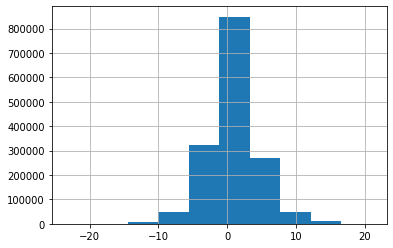

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram with aggressiveness and temperature
main_data.aggressiveness.value_counts()  
main_data.temperature_avg.hist()

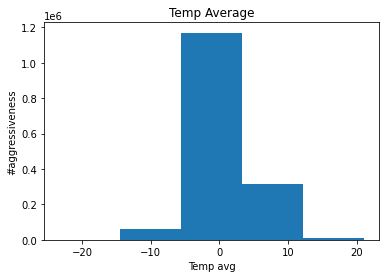

In [17]:
# Plot histogram
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(main_data['temperature_avg'],bins=5)
plt.title('Temp Average')
plt.xlabel('Temp avg')
plt.ylabel('#aggressiveness')
plt.show()

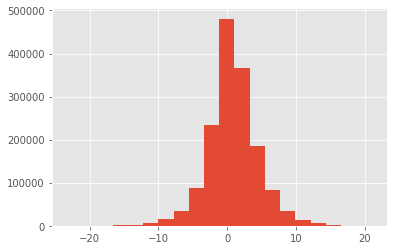

In [23]:
# Plot temperature
# Can determine bins based on num observations max val - min val
plt.style.use('ggplot')
plt.hist(main_data['temperature_avg'],bins=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


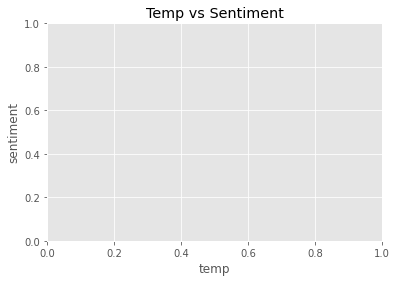

In [27]:
# Temperature scatter plat
new1_ax = fig.add_subplot(1,1,1)
new1_ax.scatter(main_data['temperature_avg'],main_data['sentiment'])
plt.title('Temp vs Sentiment')
plt.xlabel('temp')
plt.ylabel('sentiment')
plt.style.use('ggplot')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


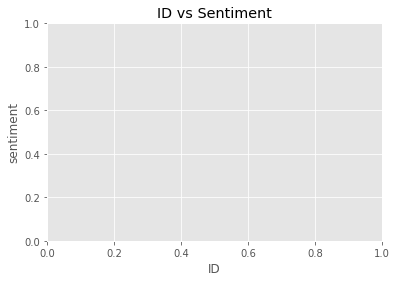

In [28]:
# Id scatter plat
new2_ax = fig.add_subplot(1,1,1)
new2_ax.scatter(main_data['id'],main_data['sentiment'])
plt.title('ID vs Sentiment')
plt.xlabel('ID')
plt.ylabel('sentiment')
plt.style.use('ggplot')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


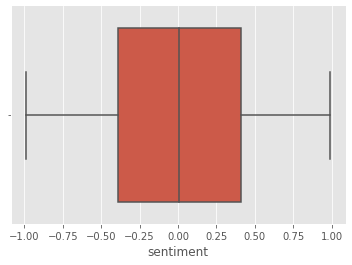

In [26]:
# Box plot
sns.boxplot(main_data['sentiment'])
sns.despine()

In [30]:
# Frequency table sentiment vs gender
freq1 = main_data.groupby(['gender','sentiment'])
freq1.size()

gender     sentiment
female     -0.987095    1
           -0.985158    1
           -0.984053    1
           -0.983041    1
           -0.982399    1
                       ..
undefined   0.957592    1
            0.961094    1
            0.969081    1
            0.971074    1
            0.974020    1
Length: 4699589, dtype: int64

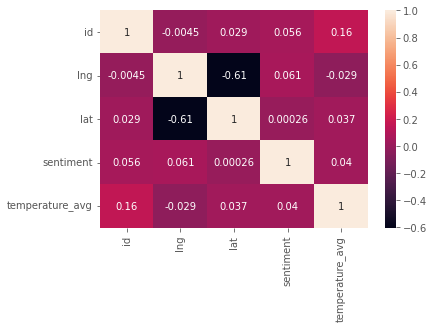

In [32]:
# Correlation matrix for Twitter 
corr_matx = main_data.corr()
sns.heatmap(corr_matx, annot=True)
plt.show()

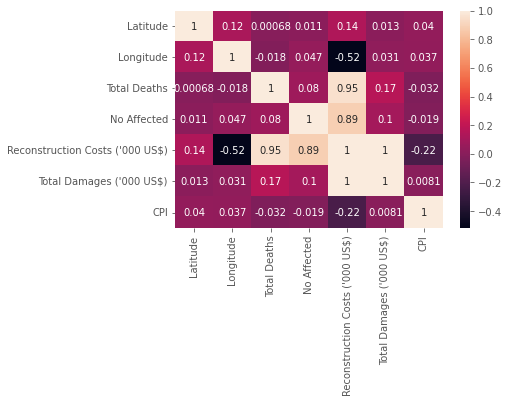

In [33]:
# Correlation matrix for disasters
corr_matx = disasters.corr()
sns.heatmap(corr_matx, annot=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


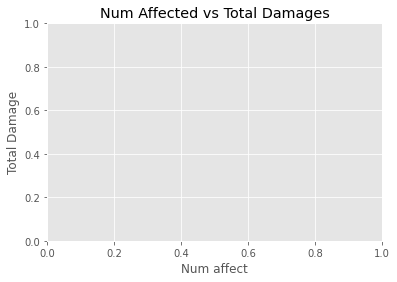

In [36]:
import warnings
warnings.filterwarnings( "ignore", module = "matplotlib\..*" )


# Id scatter plat
new3_ax = fig.add_subplot(2,2,2)
new3_ax.scatter(disasters['No Affected'],disasters["Total Damages ('000 US$)"])
plt.title('Num Affected vs Total Damages')
plt.xlabel('Num affect')
plt.ylabel('Total Damage')
plt.style.use('ggplot')
plt.show()

In [ ]:
# Store the 'Survived' feature in a new variable and remove it from the dataset
outcomes = full_data['Survived']
features_raw = full_data.drop('Survived', axis = 1)

# Show the new dataset with 'Survived' removed
display(features_raw.head())

In [ ]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no salaries
    2. Create X as all the columns that are not the Salary column
    3. Create y as the Salary column
    4. Drop the Salary, Respondent, and the ExpectedSalary columns from X
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    # Drop rows with missing salary values
    df = df.dropna(subset=['Salary'], axis=0)
    y = df['Salary']
    
    #Drop respondent and expected salary columns
    df = df.drop(['Respondent', 'ExpectedSalary', 'Salary'], axis=1)
    
    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
        
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    X = df
    return X, y
    
#Use the function to create X and y
X, y = clean_data(df)    

In [ ]:
#cutoffs here pertains to the number of missing values allowed in the used columns.
#Therefore, lower values for the cutoff provides more predictors in the model.
cutoffs = [5000, 3500, 2500, 1000, 100, 50, 30, 25]

r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = t.find_optimal_lm_mod(X, y, cutoffs)

In [ ]:
# Removing the names
features_no_name = features_raw.drop(['Name'], axis=1)

# One-hot encoding
features = pd.get_dummies(features_no_name)

In [ ]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, outcomes, test_size=0.2, random_state=42)

In [ ]:
# Import the classifier from sklearn
from sklearn.tree import DecisionTreeClassifier

# TODO: Define the classifier, and fit it to the data
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

In [ ]:
# Making predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate the accuracy
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)

In [ ]:
# Training the model
model = DecisionTreeClassifier(max_depth=6, min_samples_leaf=6, min_samples_split=10)
model.fit(X_train, y_train)

# Making predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculating accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)